Savage Dickey Density Ratio (Bayes Factor)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/Users/cu135/bayesian_stats_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

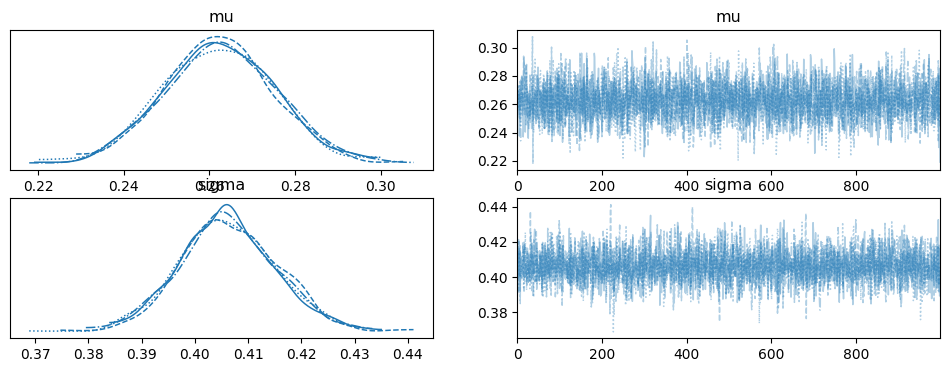

In [3]:
import numpy as np
import pymc as pm
import arviz as az

# Assuming 'data' is your observed distribution of differences between bootstrapped correlations
data = np.loadtxt('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/3_cohort_delta_r/andy_similarity_test/bayes_young/bootstrap_diffs.txt')

# Define the Bayesian model
with pm.Model() as model:
    # Prior for the mean difference (mu)
    mu = pm.Uniform('mu', lower=-1, upper=1)  # Flat prior over a reasonable range

    # Prior for the standard deviation (sigma)
    sigma = pm.Uniform('sigma', lower=-1, upper=1)  # Half-normal prior for sigma

    # Likelihood (observed data)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    
    # Sample from the posterior
    idata = pm.sample(1000, return_inferencedata=True)

az.plot_trace(idata)

H 10
- The alternative hypothesis compared to the null hypothesis. This represents the Bayes Factor for the alternative hypothesis relative to the null hypothesis

H 01
- The null hypothesis compared to the alternative hypothesis. This represents the Bayes Factor for the null hypothesis relative to the alternative hypothesis.

Notes:
- The Bayes factor is estimated by comparing a model (H1) against a model in which the parameter of interest has been restricted to be a point-null (H0). This computation assumes the models are nested and thus H0 is a special case of H1.\
- BF10 (H1/H0 ratio), noting the model deviates significantly from the prior
- BF01 (H0/H1 ratio), noting the prior and model are highly similar. 

Interpretation
Bayes Factor (
BF
10
BF 
10
​
 ): This is the ratio of the posterior density to the prior density at the point of interest (
𝜃
0
θ 
0
​
 ). It quantifies the evidence in favor of the alternative hypothesis (
𝐻
1
H 
1
​
 ) over the null hypothesis (
𝐻
0
H 
0
​
 ).

BF10 (H1/H0 ratio): A higher value of 
BF
10
BF 
10
​
  indicates more support for the alternative hypothesis compared to the null hypothesis. If the model deviates significantly from the prior, it suggests that the data provide strong evidence against the null hypothesis.

BF01 (H0/H1 ratio): The reciprocal of 
BF
10
BF 
10
​
 . A higher value of 
BF
01
BF 
01
​
  indicates more support for the null hypothesis compared to the alternative hypothesis. If the prior and model are highly similar, it suggests that the data provide little evidence to move away from the null hypothesis.

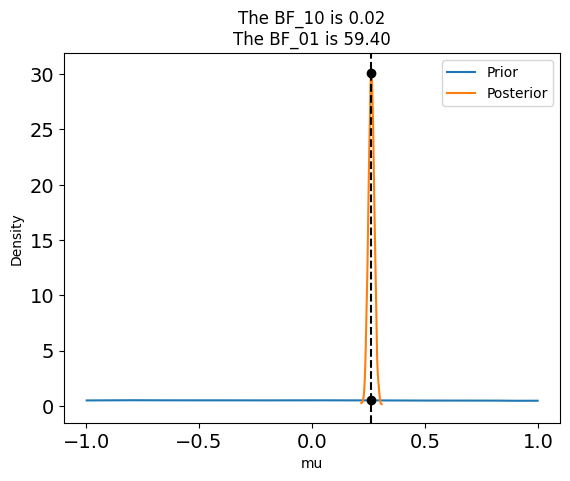

In [14]:
import arviz as az
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Compute and plot the Bayes Factor
prior_samples = np.random.uniform(-1, 1, 10000)
az.plot_bf(idata, var_name='mu', prior=prior_samples, ref_val=.26, ax=ax)
output_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/3_cohort_delta_r/andy_similarity_test/bayes_young/bf_young.svg'
fig.savefig(output_path, format='svg')